# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


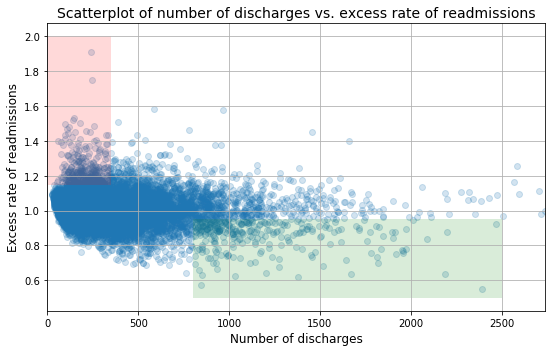

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or Why not?

I find the analysis lacking in a number of ways. Though missing data was taken care of.

First, this analysis is based on a single, incomplete scatter plot and its problems stem from that. I say incomplete because the scatterplot excludes outliers of very large hospitals. The analysis also mentions a "significant correlation between hospital capacity ... and readmission rates." But provides no statistical backing for these claims.

Finally, I disagree with the conclusions drawn by this analysis. Provided there $is$ a correllation, it is not clear as to whether or not other factors included in the dataset may have a stronger correlation.

In [5]:
hosp_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


## B. Provide support for your arguments and your own recommendations with a statistcally sound analysis.

### 1. Setup an appropriate hypthoesis test.

$H_0 =$ Hospitals with whose number of discharges are less than 100 have the same distribution as those with more than 100.

$H_A =$ Hospitals with whose number of discharges are less than 100 have the a different distribution as those with more than 100.

In [6]:
hosp_df = hosp_df[['Number of Discharges', 'Excess Readmission Ratio']]
hosp_df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

large_df = hosp_df[hosp_df['Number of Discharges'] > 250]
small_df = hosp_df[hosp_df['Number of Discharges'] <= 250]

print('Large', large_df['Excess Readmission Ratio'].describe())
print('small', small_df['Excess Readmission Ratio'].describe())
large_mean = np.mean(large_df['Excess Readmission Ratio'])
small_mean = np.mean(small_df['Excess Readmission Ratio'])

Large count    6405.000000
mean        1.001497
std         0.099484
min         0.549500
25%         0.940600
50%         0.999400
75%         1.061200
max         1.583600
Name: Excess Readmission Ratio, dtype: float64
small count    5092.000000
mean        1.015059
std         0.080905
min         0.760200
25%         0.963400
50%         1.007200
75%         1.055100
max         1.909500
Name: Excess Readmission Ratio, dtype: float64


### 2. Compute and report the observed significance value (or p-value).

First we look at the distributions as a histogram to give us context

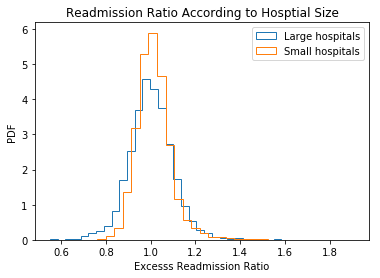

In [7]:
fig = plt.figure()
_ = plt.hist(large_df['Excess Readmission Ratio'], bins=30, density=True, histtype='step')
_ = plt.hist(small_df['Excess Readmission Ratio'], bins=30, density=True, histtype='step')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

The distributions look different enough, with small hospitals looking right skewed while having a narrower distribution. So we will use a bootstrap test to verify that and test our hypothesis.'

In [8]:
def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)


diff_obs = diff_of_means(large_df['Excess Readmission Ratio'], small_df['Excess Readmission Ratio'])
print('the observed difference is: ',diff_obs)
# Concatenate forces: forces_concat
both_conc = np.concatenate((large_df['Excess Readmission Ratio'], small_df['Excess Readmission Ratio']))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(both_conc, size=len(both_conc))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(small_df['Excess Readmission Ratio'])],
                                     bs_sample[len(small_df['Excess Readmission Ratio']):])

# Compute and print p-value: p
p = np.sum(abs(bs_replicates) >= abs(diff_obs)) / len(bs_replicates)
print('p-value =', p)

the observed difference is:  -0.013561774070608656
p-value = 0.0


The $p$-value is 0. Thus, in 10,000 trials not a single trial produced a difference in means as extreme as was observed ($-0.014$). Therefore, we reject the null hypothesis and conclude there is a statistically significant difference in the Excess rate of readmissions for large and small hospitals.

### 3. Report statistical significance for  $\alpha = 0.01$.

The observed $p$ value of 0.0 means that $p \leq 0.01$ which is equivalent to $\alpha = 0.01$.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In [9]:
r = np.corrcoef(hosp_df['Number of Discharges'], hosp_df['Excess Readmission Ratio'])[0, 1]
print('correlation r = ', r)

correlation r =  -0.09739794351079353


Our analysis showed a very strong statistical signifigance for whether or not there was a difference in readmission ratios for small and large hospitals ($p \leq 0.01$). This contrasts, however, a very small observed difference ($d = -0.014$) and a very weak pearson correllation ($r = -0.097$).

So, while our statistical signigance gives us a great deal of confidence in our results, those results do not show a strong relationship.

### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

The original plot did a good job showing the distribution of sizes of hospitals and does show a slight negative correllation (which we found statistically). However, it excludes very important outliers and also obscures the relationship between the small hospitals and readmission rates. The shaded areas are also a hand-wavy way to exhibit a correllative relationship.

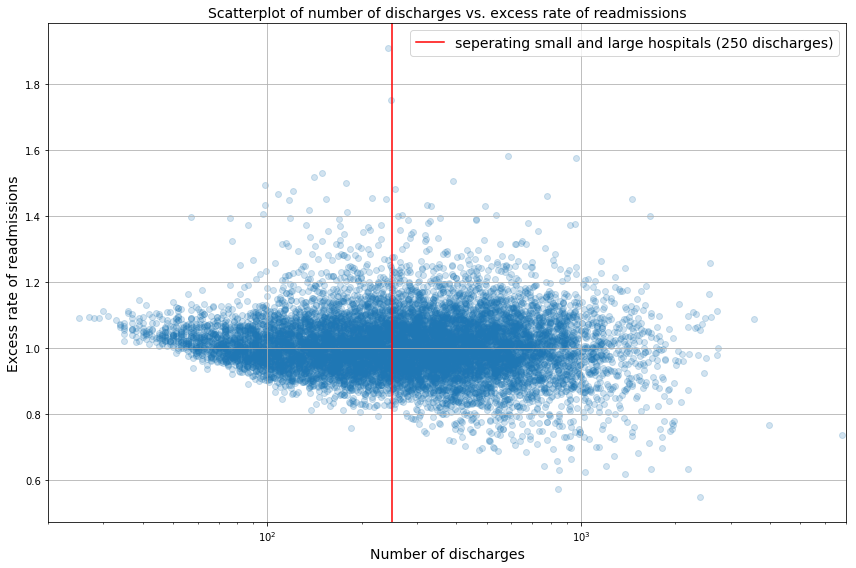

In [10]:
x = [a for a in hosp_df['Number of Discharges']]
y = list(hosp_df['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([20,7000])
ax.set_xscale('log')
ax.set_xlabel('Number of discharges', fontsize=14)
ax.set_ylabel('Excess rate of readmissions', fontsize=14)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.axvline(x=250, color = 'red', label = 'seperating small and large hospitals (250 discharges)')
ax.legend(fontsize=14)

ax.grid(True)
fig.tight_layout()

Since the distribution of numbers of hospitals of different sizes isnt uniform, we use a log scale in the $x-axis$ to make it easier to compare each subset which is distinguished by a dividing line. This way we can note that the larger hospitals do appear slightly more normal than the smaller ones.